In [269]:
!pip install xgboost #instal xgboost package

In [270]:
!pip install yellowbrick #install yellowbrick package

##Importing Libraries

In [271]:
#Import necessary libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, plot, legend, subplots
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style
import joblib
import pickle
import warnings
warnings.simplefilter("ignore")

In [272]:
#Model model building libraries
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [273]:
#import Feature plot libraries
from yellowbrick.model_selection import FeatureImportances
from xgboost import plot_importance

##Exploratory Data Analysis (EDA)



1.   Initial Data Understanding

  *   Data loading and Inspection
  *   Data Types
  *   Missing Values
  *   Duplicates







In [274]:
#import full dataset
df = pd.read_csv('bank-full.csv',delimiter=";", header = 0)
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [275]:
#import test dataset
dft = pd.read_csv('bank.csv',delimiter=";", header = 0)
print(dft)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [276]:
#view of first 5 rows of dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [277]:
#view of last 5 rows of dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [278]:
#view of number of rowns and columns
df.shape

(45211, 17)

In [279]:
#view of datatypes in dataset
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [280]:
#summary of numerical data
df.select_dtypes(include=('float64','int64')).describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [281]:
#summary of categorical data
df.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [282]:
#check missing values of dataset
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [283]:
#checking for duplicated rows
df.duplicated().sum()

np.int64(0)

<function matplotlib.pyplot.show(close=None, block=None)>

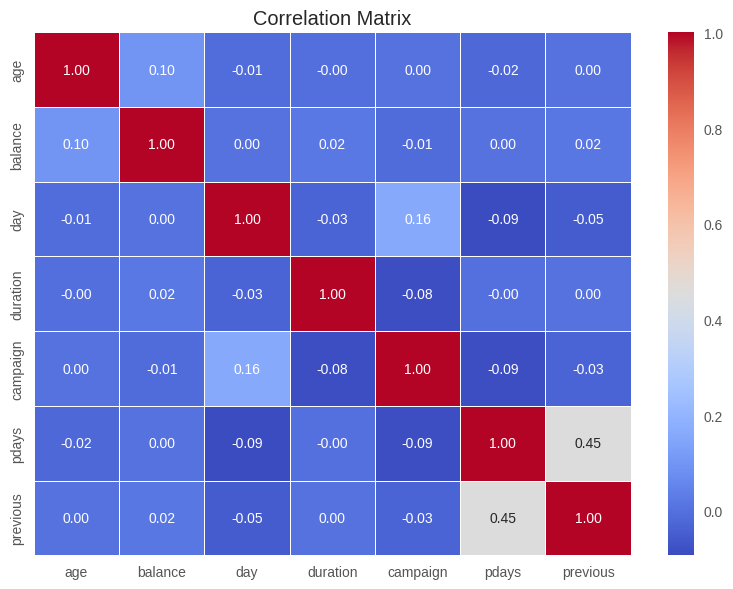

In [284]:
#Correlation Plot
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show

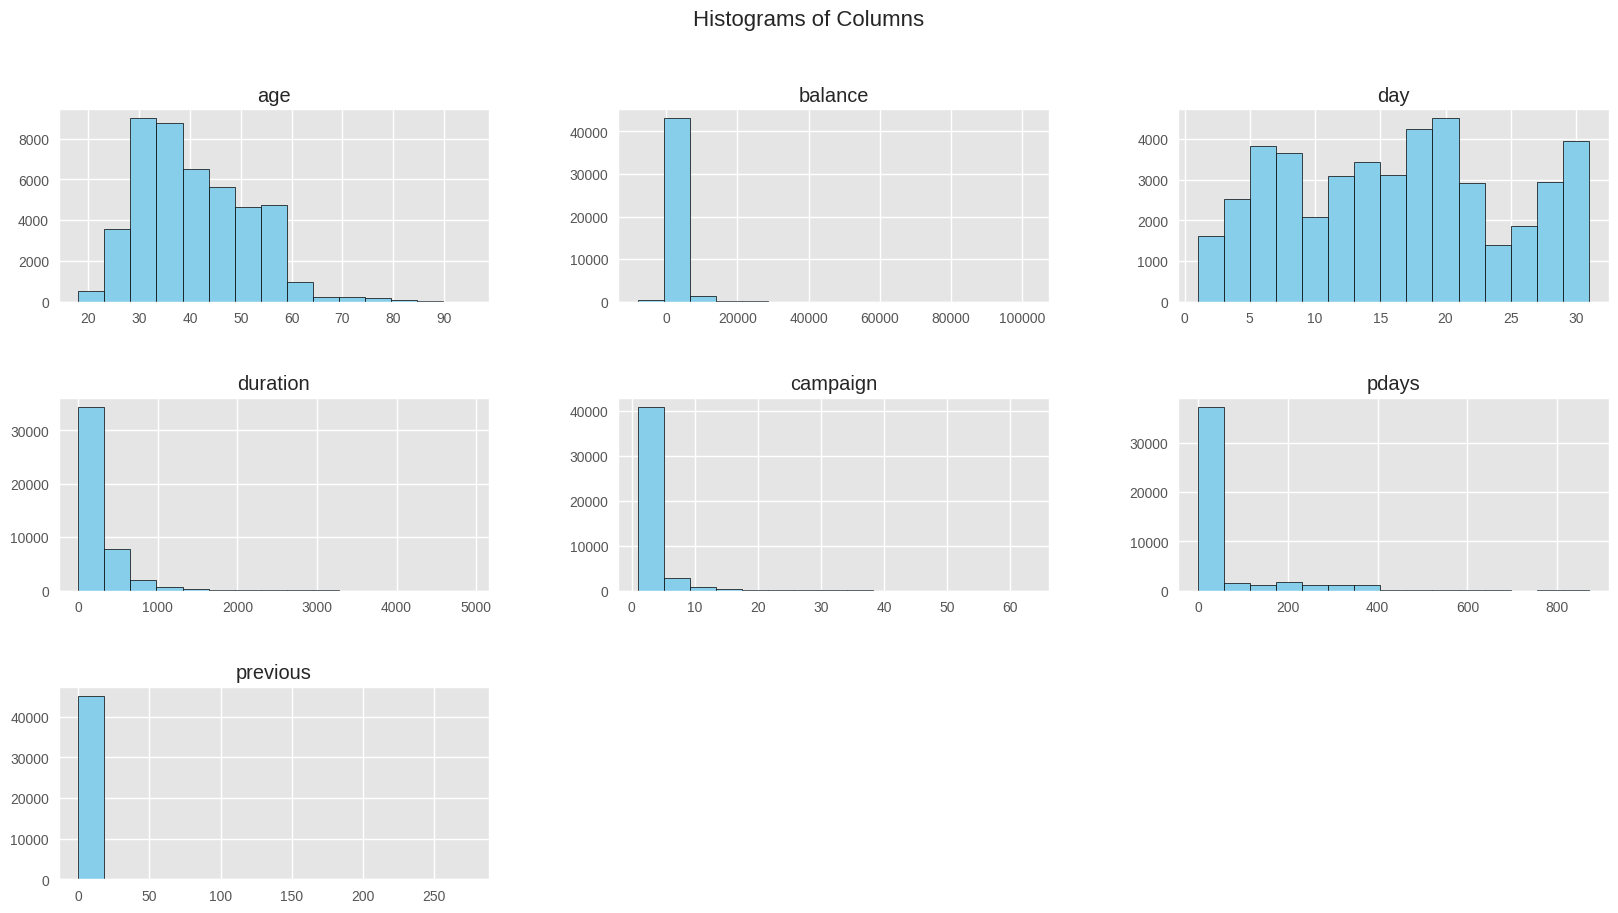

In [285]:
#Histogram of numerical variables
df.hist(bins=15, figsize=(20, 10), color='skyblue', edgecolor='black')
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)
show()

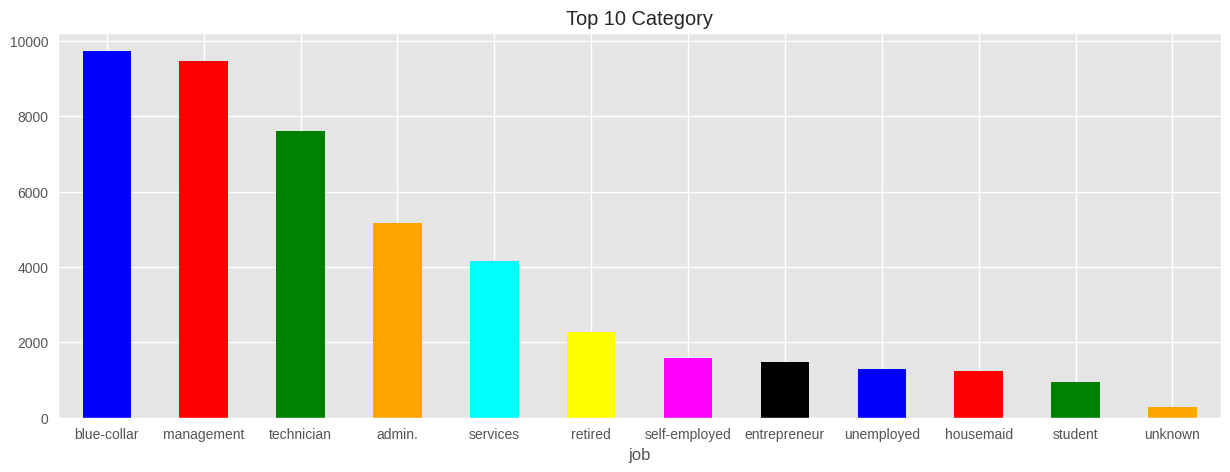

In [286]:
#Barplot of Target variable
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['job'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()


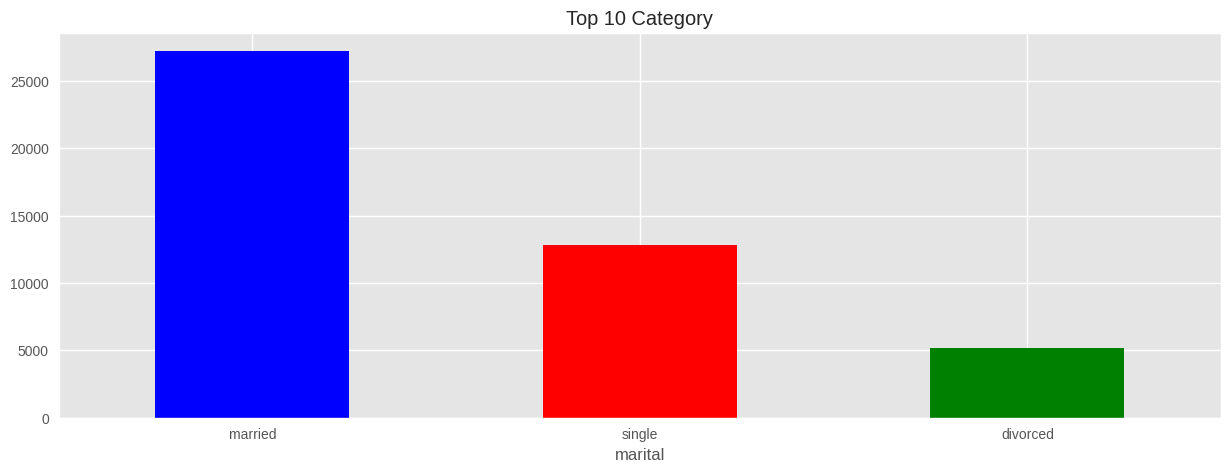

In [287]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['marital'].value_counts()[:4]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

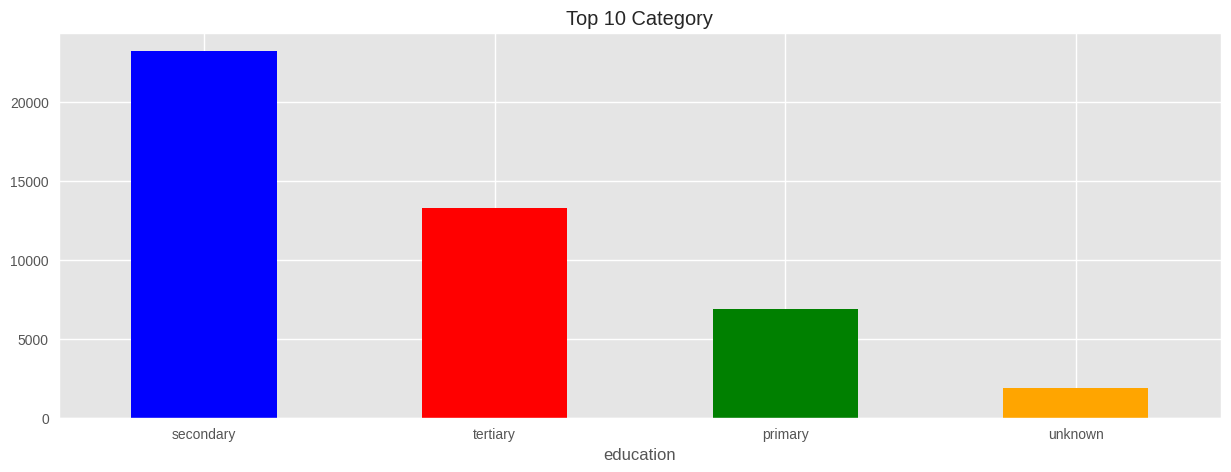

In [288]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['education'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

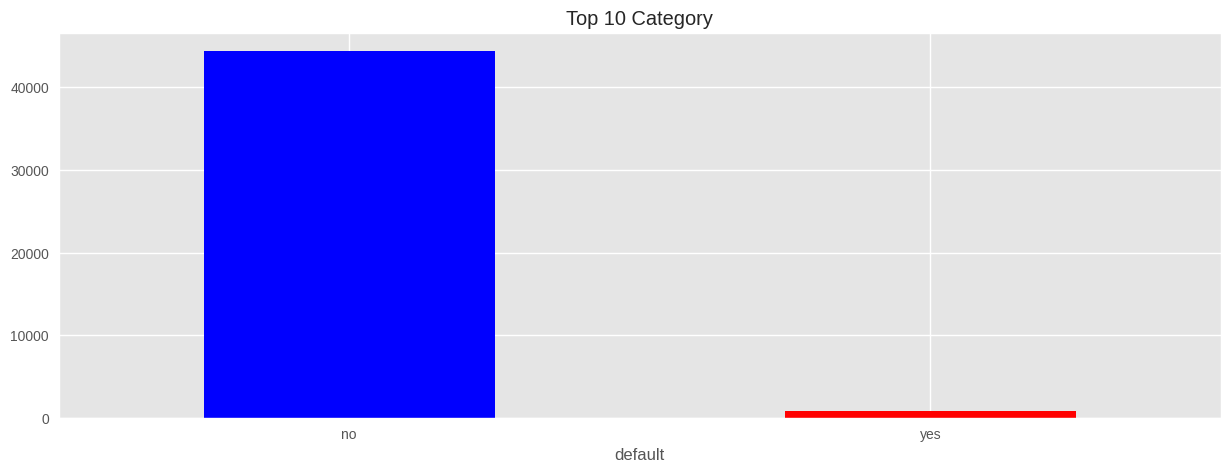

In [289]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['default'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

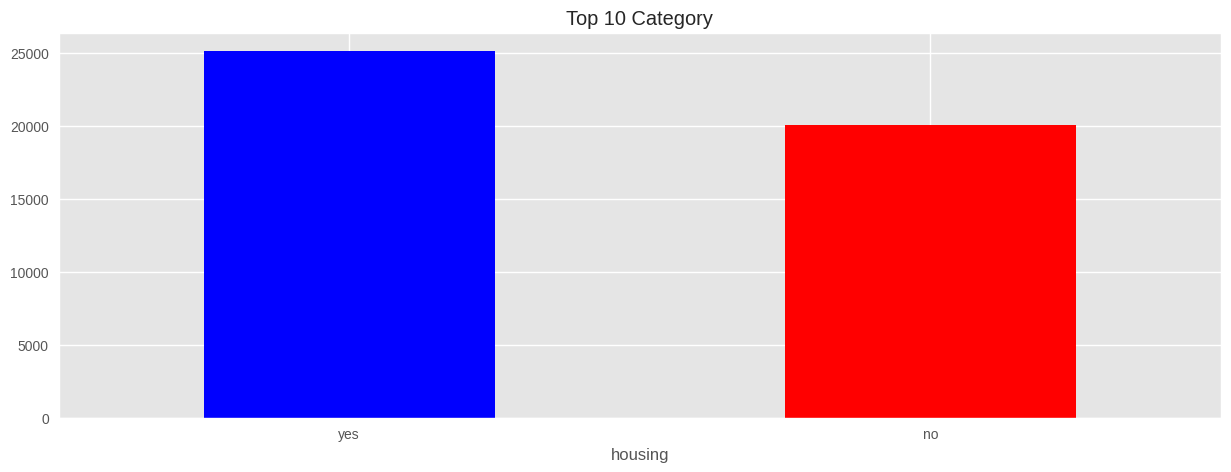

In [290]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['housing'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

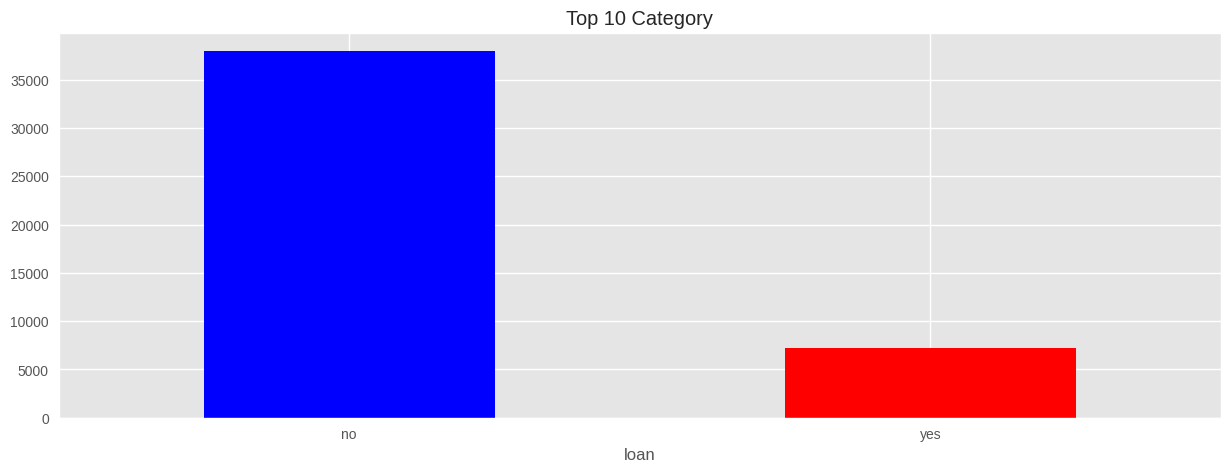

In [291]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['loan'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

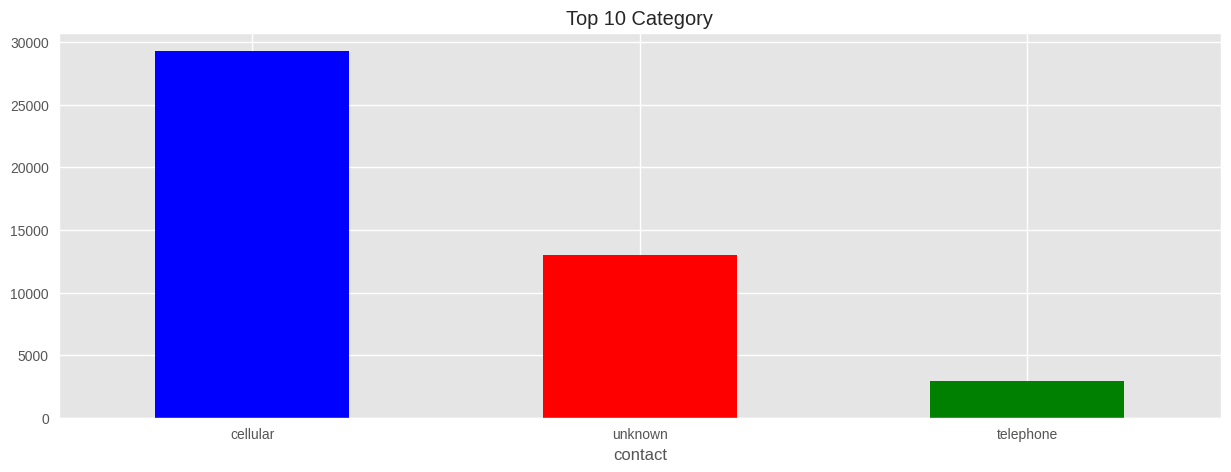

In [292]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['contact'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

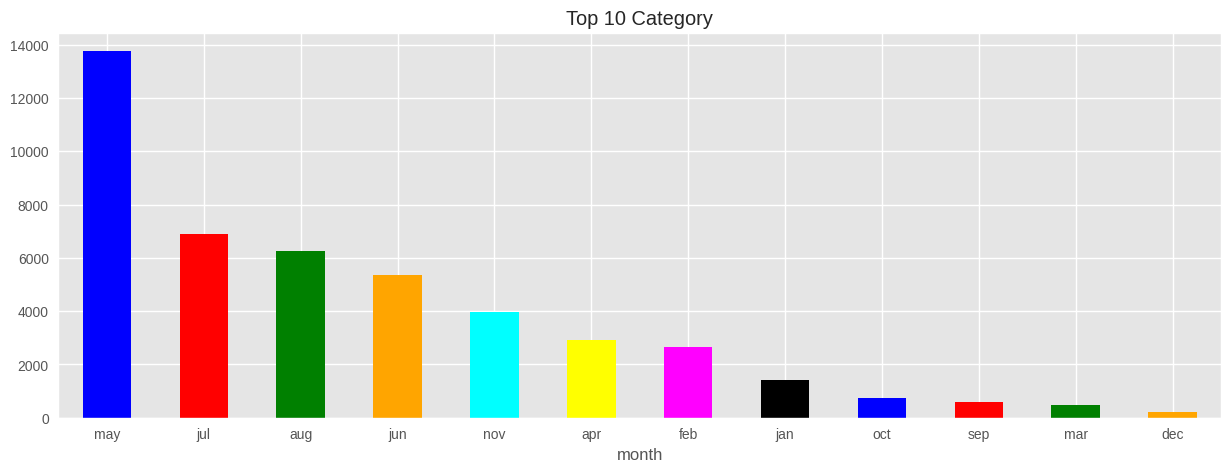

In [293]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['month'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

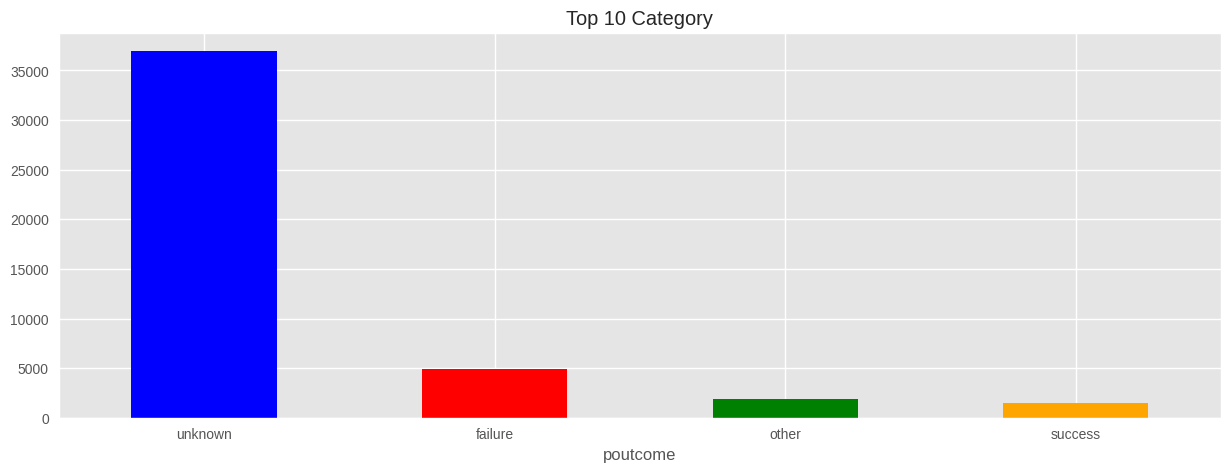

In [294]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['poutcome'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

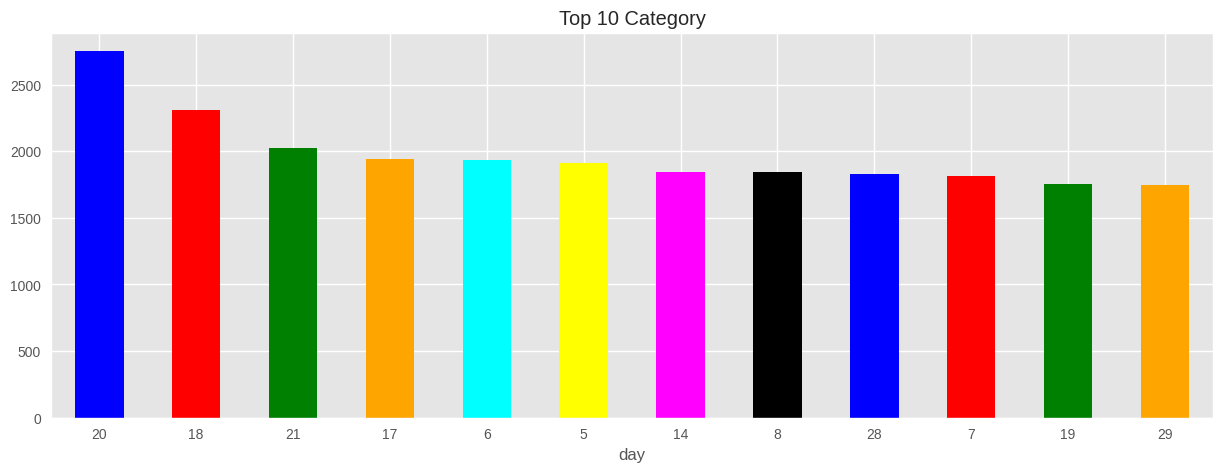

In [295]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['day'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

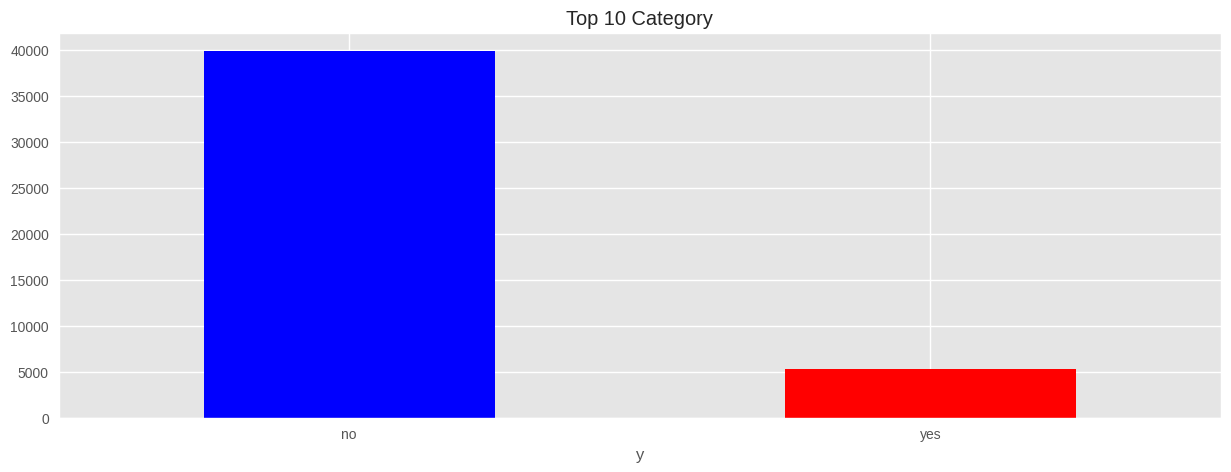

In [296]:
style.use('ggplot')
figure(figsize=(15,5))
Top10=df['y'].value_counts()[:12]
colors=['blue','red','green','orange','cyan','yellow','magenta','black']
Top10.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Category')
show()

<Axes: xlabel='education', ylabel='age'>

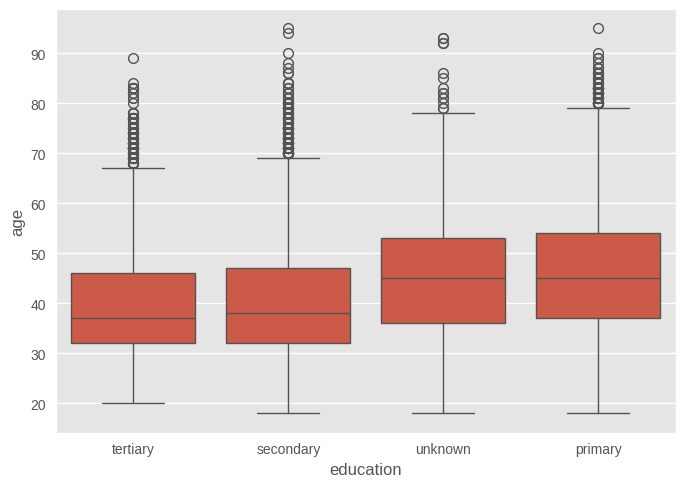

In [297]:
sns.boxplot(data=df, x='education', y='age')

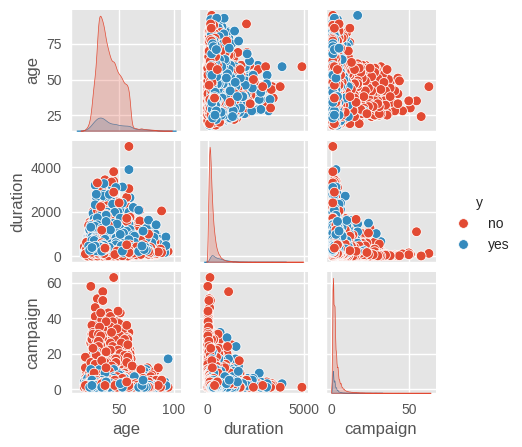

In [298]:
sns.pairplot(data=df[['age', 'duration', 'campaign', 'y']], hue='y', height=1.5)

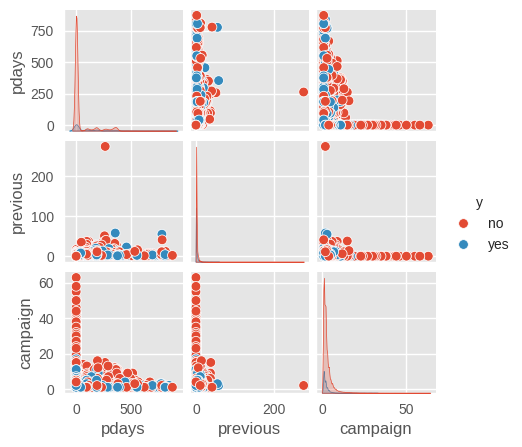

In [299]:

sns.pairplot(data=df[['pdays', 'previous', 'campaign', 'y']], hue='y', height=1.5)

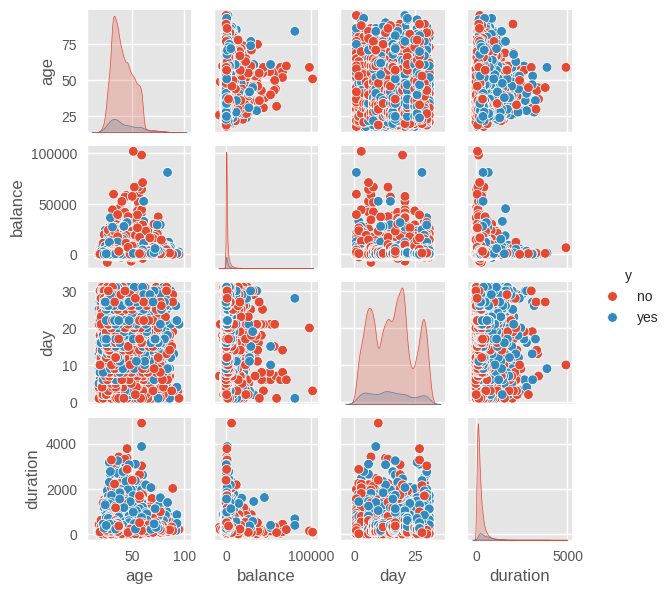

In [300]:

sns.pairplot(data=df[['age', 'balance', 'day','duration' ,'y']], hue='y', height=1.5)

##Data Cleaning

In [301]:
#Remove all duplicates rows
df.drop_duplicates(inplace=True)

In [302]:
df.shape

(45211, 17)

In [303]:
#removing rows with unknown as observation in selected columns
df_clean = df[~((df['job']=='unknown') |(df['marital'] == 'unknown') |(df['education'] == 'unknown') |(df['default'] == 'unknown') |(df['housing'] == 'unknown') | (df['loan'] == 'unknown'))]

In [304]:
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [305]:
#check dataframe columns
df_clean.shape

(43193, 17)

##Transforming Categorical Variables to Numerical Variables

Transform train data

In [306]:
#Detecting numerical features from data
num_cols = df_clean._get_numeric_data().columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [307]:
#Detecting categorical features in data
categorical_columns=list(set(df_clean.columns) - set(num_cols))
categorical_columns

['month',
 'default',
 'y',
 'housing',
 'loan',
 'marital',
 'education',
 'contact',
 'poutcome',
 'job']

In [308]:
#Encoding categorical features with label encoding
for column in categorical_columns:
    df_clean[column] = LabelEncoder().fit_transform(df_clean[column])

#print(df_clean)

In [309]:
#check dataframe
df_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [310]:
#check shape
df_clean.shape

(43193, 17)

In [311]:
#Checking Imbalance representation in target feature
df_clean['y'].value_counts()

,count
y,
0,38172
1,5021


In [312]:
#Percentage of imbalance data in target feature
print('0 (y)', round(df_clean['y'].value_counts()[0]/len(df_clean) * 100,2), '% of the dataset')
print('1 (y)', round(df_clean['y'].value_counts()[1]/len(df_clean) * 100,2), '% of the dataset')

0 (y) 88.38 % of the dataset
1 (y) 11.62 % of the dataset


Transform test data

In [313]:
#Detecting numerical features from data
num_colst = dft._get_numeric_data().columns
num_colst

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [314]:
#Detecting categorical features in data
categorical_columnst=list(set(dft.columns) - set(num_cols))
categorical_columnst

['month',
 'default',
 'y',
 'housing',
 'loan',
 'marital',
 'education',
 'contact',
 'poutcome',
 'job']

In [315]:
#Encoding categorical features with label encoding
for column in categorical_columnst:
    dft[column] = LabelEncoder().fit_transform(dft[column])

#print(df_clean)

## Splitting data into Train and Test set

In [316]:
# Separate input features (X) and target variable (y)
y_train = df_clean.y
X_train = df_clean.drop('y', axis=1)
X_test = dft.drop('y', axis=1)
y_test = dft.y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [317]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [318]:
# Display results
print("Original dataset shape:", X_train.shape, y_train.value_counts())
print("Resampled dataset shape:", X_resampled.shape, pd.Series(y_resampled).value_counts())

Original dataset shape: (43193, 16) y
0    38172
1     5021
Name: count, dtype: int64
Resampled dataset shape: (76344, 16) y
0    38172
1    38172
Name: count, dtype: int64


## Training and Evaluating Classification Predictive Models

## XGBoost Classifier

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4000
           1       0.82      0.70      0.75       521

    accuracy                           0.95      4521
   macro avg       0.89      0.84      0.86      4521
weighted avg       0.95      0.95      0.95      4521

0.9477991594779916
[[3922   78]
 [ 158  363]]
precision =  0.8231292517006803 
 recall =  0.6967370441458733


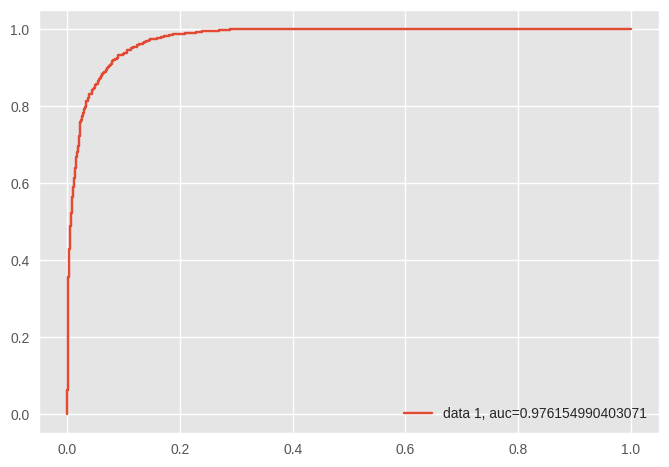

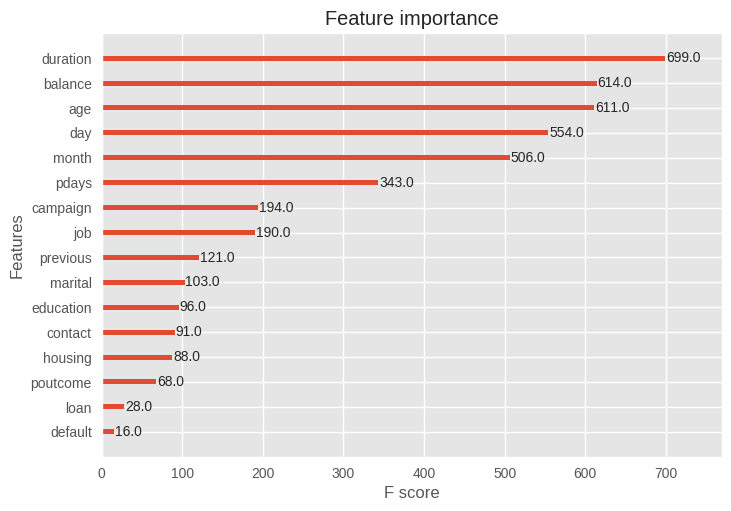

In [319]:
xgb=XGBClassifier()
xgb=xgb.fit(X_train,y_train)

pred = xgb.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# plot feature importance
plot_importance(xgb)
plt.show()

## Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.53      0.17      0.26       521

    accuracy                           0.89      4521
   macro avg       0.72      0.57      0.60      4521
weighted avg       0.86      0.89      0.86      4521

0.8869719088697191
[[3922   78]
 [ 433   88]]
precision =  0.5301204819277109 
 recall =  0.1689059500959693


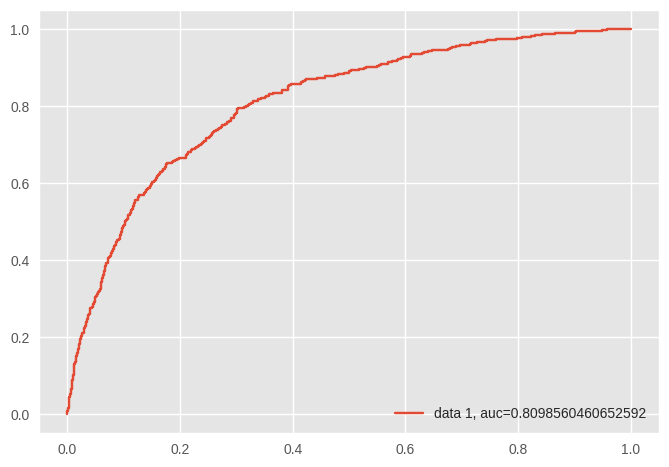

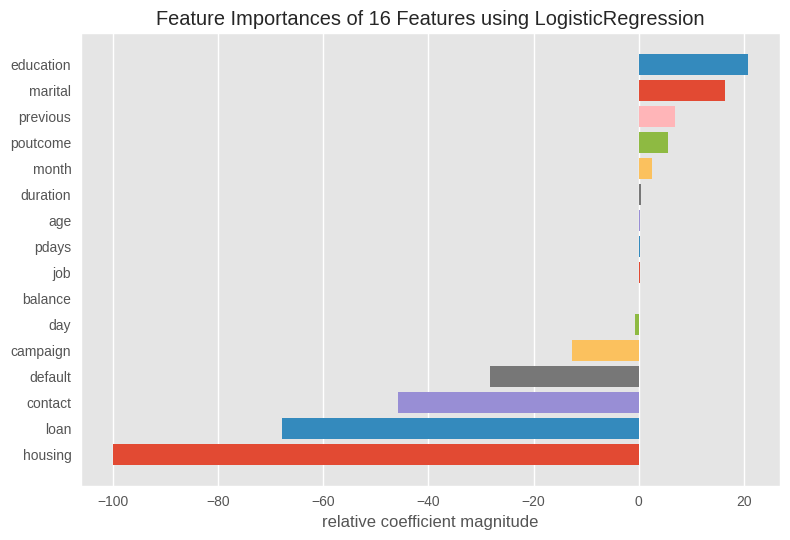

<Axes: title={'center': 'Feature Importances of 16 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [320]:
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

log_reg = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(log_reg)
viz.fit(X_train,y_train)
viz.show()

## Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4000
           1       0.34      0.44      0.38       521

    accuracy                           0.84      4521
   macro avg       0.63      0.66      0.65      4521
weighted avg       0.86      0.84      0.85      4521

0.8374253483742535
[[3557  443]
 [ 292  229]]
precision =  0.34077380952380953 
 recall =  0.43953934740882916


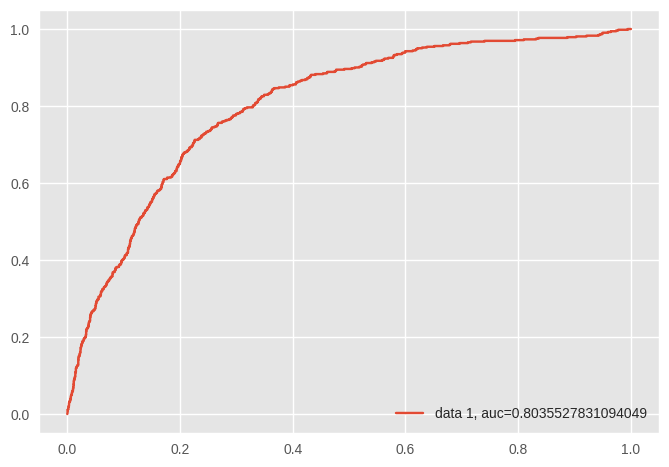

In [321]:
nav_bays = GaussianNB()
nav_bays.fit(X_train,y_train)

pred = nav_bays.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = nav_bays.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.96      0.98      0.97       521

    accuracy                           0.99      4521
   macro avg       0.98      0.99      0.98      4521
weighted avg       0.99      0.99      0.99      4521

0.993364299933643
[[3981   19]
 [  11  510]]
precision =  0.9640831758034026 
 recall =  0.9788867562380038


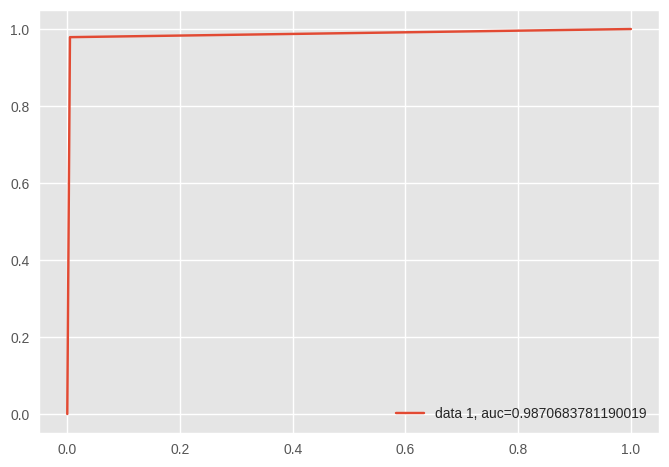

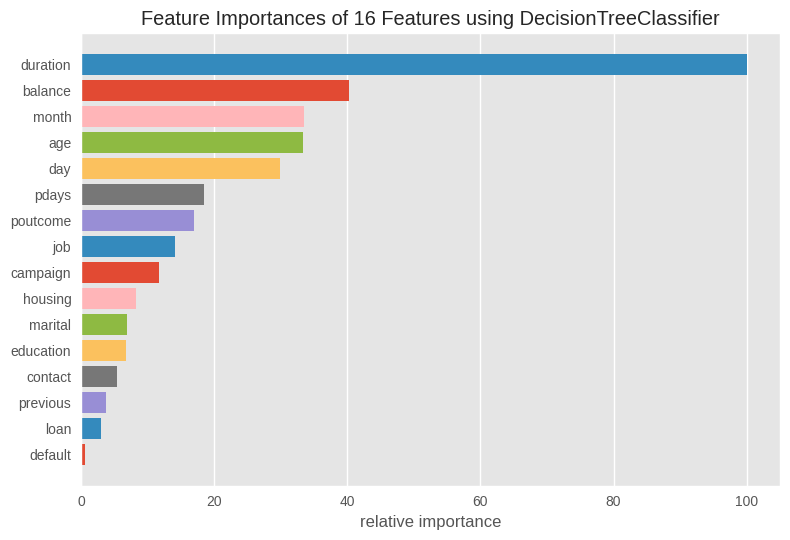

<Axes: title={'center': 'Feature Importances of 16 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [322]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Feature Selection for Decision Tree
dec_tre = DecisionTreeClassifier()
viz = FeatureImportances(dec_tre)
viz.fit(X_train,y_train)
viz.show()

## Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       0.98      0.98      0.98       521

    accuracy                           1.00      4521
   macro avg       0.99      0.99      0.99      4521
weighted avg       1.00      1.00      1.00      4521

0.9951338199513382
[[3989   11]
 [  11  510]]
precision =  0.9788867562380038 
 recall =  0.9788867562380038


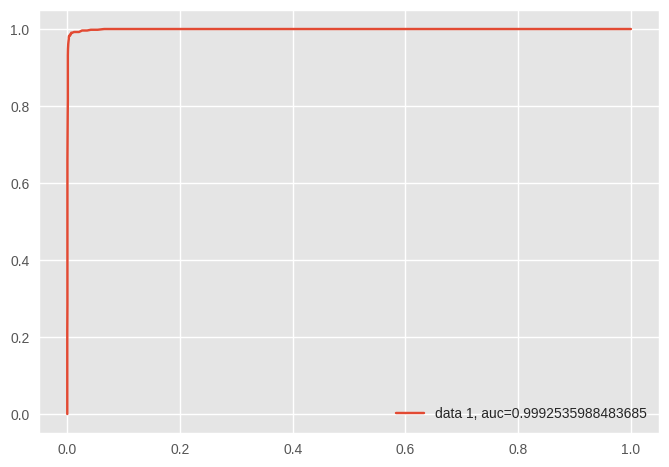

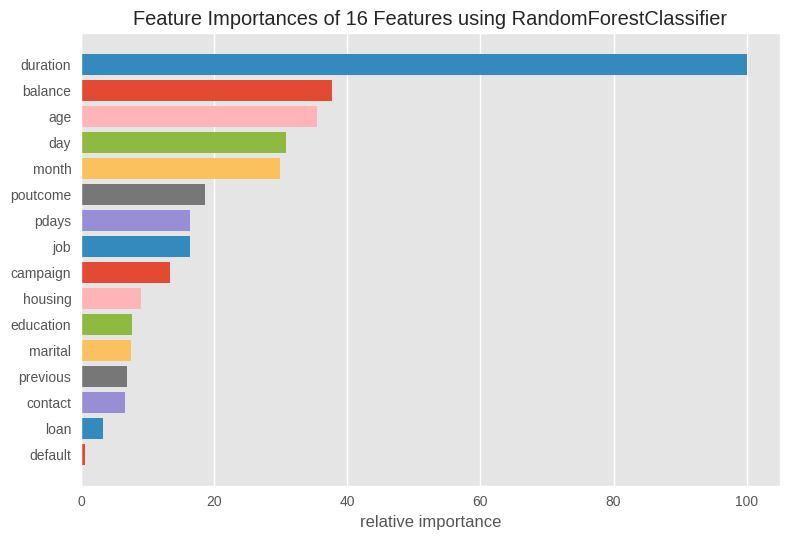

<Axes: title={'center': 'Feature Importances of 16 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [323]:
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train,y_train)

pred = ran.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#Feature Selection for Random Forest
ran_for=RandomForestClassifier()
viz = FeatureImportances(ran_for)
viz.fit(X_train,y_train)
viz.show()

## K-Nearest Neighbors Classifier

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4000
           1       0.67      0.43      0.52       521

    accuracy                           0.91      4521
   macro avg       0.80      0.70      0.74      4521
weighted avg       0.90      0.91      0.90      4521

0.9099756690997567
[[3892  108]
 [ 299  222]]
precision =  0.6727272727272727 
 recall =  0.42610364683301344


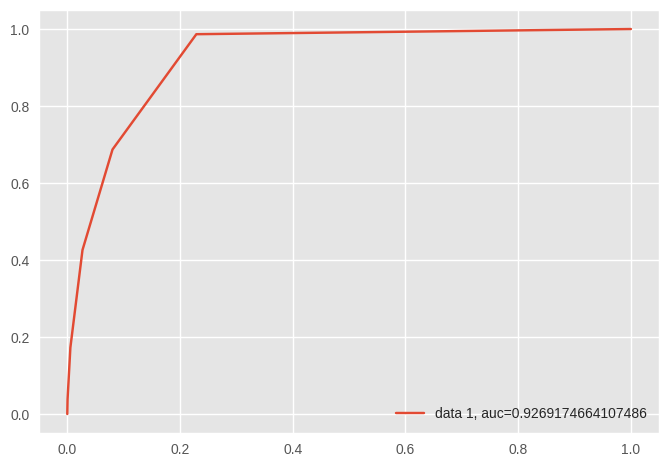

In [324]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4000
           1       0.64      0.40      0.49       521

    accuracy                           0.90      4521
   macro avg       0.78      0.68      0.72      4521
weighted avg       0.89      0.90      0.90      4521

0.904888299048883
[[3883  117]
 [ 313  208]]
precision =  0.64 
 recall =  0.39923224568138194


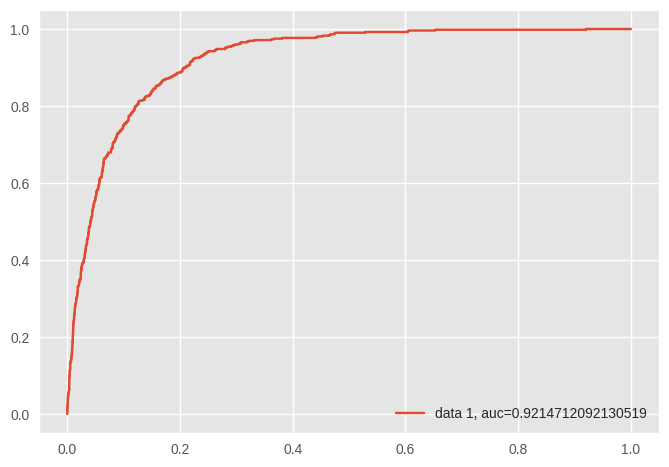

In [325]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
pred = gb_classifier.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = gb_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Support Vector Machine Classifier

In [326]:
#svc = SVC(kernel='linear')
#svc.fit(X_train, y_train)
#pred = svc.predict(X_test)
#print(classification_report(y_test,pred))
#print (accuracy_score(y_test,pred))
#print (confusion_matrix(y_test,pred))

#precision = precision_score(y_test,pred)
#recall = recall_score(y_test,pred)
#print( 'precision = ', precision, '\n', 'recall = ', recall)

Comparing model performance metrics

In [327]:
f1=[]
accuracy=[]
precision=[]
recall=[]
auc=[]
def reg(model):
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  F1 = f1_score(y_test,pred)
  ACCURACY = accuracy_score(y_test,pred)
  PRECISION = precision_score(y_test,pred)
  RECALL = recall_score(y_test,pred)
  AUC = roc_auc_score(y_test, y_pred_proba)
  f1.append(F1)
  accuracy.append(ACCURACY)
  precision.append(PRECISION)
  recall.append(RECALL)
  auc.append(AUC)

In [328]:
XGBoostClassifier_model = XGBClassifier()
LogisticRegressionClassifier_model = LogisticRegression(penalty='l2', C=0.1)
NaiveBayesClassifier_model = GaussianNB()
DecisionTreeClassifier_model = DecisionTreeClassifier()
RandomForestClassifier_model = RandomForestClassifier()
KNearestNeighborsClassifier_model = KNeighborsClassifier()
#SupportVectorMachineClassifier_model = SVC(kernel='linear')
GradientBoostingClassifier_model = GradientBoostingClassifier()

In [329]:
reg(XGBoostClassifier_model)
reg(LogisticRegressionClassifier_model)
reg(NaiveBayesClassifier_model)
reg(DecisionTreeClassifier_model)
reg(RandomForestClassifier_model)
reg(KNearestNeighborsClassifier_model)
#reg(SupportVectorMachineClassifier_model)
reg(GradientBoostingClassifier_model)

In [330]:
#making table of models
Algorithms = ['XGBoostClassifier_model','LogisticRegressionClassifier_model','NaiveBayesClassifier_model','DecisionTreeClassifier_model','RandomForestClassifier_model','KNearestNeighborsClassifier_model','GradientBoostingClassifier_model']

In [331]:
#making metrics of models performance
result=DataFrame({'Algorithms':Algorithms,'f1':f1,'accuracy':accuracy,'precision':precision,'recall':recall,'auc':auc})
result

,Algorithms,f1,accuracy,precision,recall,auc
0,XGBoostClassifier_model,0.754678,0.947799,0.823129,0.696737,0.921471
1,LogisticRegressionClassifier_model,0.256186,0.886972,0.530120,0.168906,0.921471
2,NaiveBayesClassifier_model,0.383906,0.837425,0.340774,0.439539,0.921471
3,DecisionTreeClassifier_model,0.971483,0.993364,0.962335,0.980806,0.921471
4,RandomForestClassifier_model,0.980843,0.995576,0.978967,0.982726,0.921471
5,KNearestNeighborsClassifier_model,0.521739,0.909976,0.672727,0.426104,0.921471
6,GradientBoostingClassifier_model,0.491726,0.904888,0.640000,0.399232,0.921471


## Saving best performing model

In [332]:
# Save the model as a pickle in a file
#joblib.dump(RandomForestClassifier_model, 'RandomForestClassifier_model.pkl')

In [333]:
with open('RandomForestClassifier_model.pkl', 'wb') as file:
    pickle.dump(RandomForestClassifier_model, file)

In [334]:
with open('RandomForestClassifier_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)